In [1]:
import torch.nn as nn
from torchvision import models
import numpy as np
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import cv2
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset
from ex import *

In [2]:
test_size = 0.3
val_size = 0.3

In [3]:
train = pd.read_excel("./../../../../Data/AirQuality/AirQualityUCI.xlsx",sep=";")
train.drop(["Date","Time"],axis=1, inplace=True)
train_y = train.pop("AH").values.reshape(-1,1)

In [4]:
from sklearn.preprocessing import PowerTransformer

In [5]:
data = datasets.load_boston()
target =PowerTransformer().fit_transform(data.target.reshape(-1,1))
x_train, x_test, y_train, y_test \
        = train_test_split(data.data, target, test_size=test_size, random_state=1)

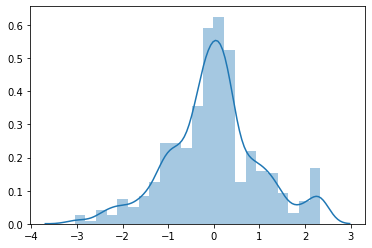

In [6]:
import seaborn as sns
sns.distplot(target)
plt.show()

In [7]:
x_train, x_val, y_train, y_val \
        = train_test_split(x_train, y_train, test_size=val_size, random_state=1)

In [8]:
x_train.shape

(247, 13)

In [9]:
y_val

array([[ 0.17637366],
       [-0.73317589],
       [ 2.33139899],
       [-2.3267595 ],
       [-3.04830272],
       [-0.01834148],
       [-1.13204625],
       [-0.10216483],
       [ 1.03894488],
       [ 0.00520128],
       [-0.55920774],
       [-0.30270166],
       [ 0.40150331],
       [-0.80875709],
       [ 0.78203901],
       [-0.94985467],
       [ 0.13162719],
       [-2.07619168],
       [-0.15109548],
       [ 0.75428897],
       [ 0.98739419],
       [ 1.95994428],
       [ 0.07478887],
       [ 1.32487038],
       [-0.21336359],
       [ 1.11481397],
       [ 0.66960511],
       [ 0.1874623 ],
       [-0.73317589],
       [-1.23645165],
       [ 2.26012359],
       [-1.5349968 ],
       [ 1.10646819],
       [-0.44856235],
       [ 0.35982462],
       [ 0.6312538 ],
       [-0.2259689 ],
       [-0.32871031],
       [ 1.53748512],
       [ 0.80955743],
       [-0.06596477],
       [ 0.42214193],
       [-0.71828684],
       [ 0.00520128],
       [-1.01480064],
       [-0

In [10]:
device="cpu"
batch_size = 100
kwargs = {} if device=='cpu' else {'num_workers': 2, 'pin_memory': True}
loader_kwargs = {'batch_size':batch_size, **kwargs}

In [29]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])
# Build Dataset
train_data = CustomTensorDataset(data=(x_train, y_train), transform=transform,
                                 dataset="boston")
val_data   = CustomTensorDataset(data=(x_val, y_val), transform=transform,
                                 dataset="boston")
test_data  = CustomTensorDataset(data=(x_test, y_test), transform=transform,
                                dataset="boston")
train_loader = DataLoader(train_data, shuffle=False, **loader_kwargs)
val_loader   = DataLoader(val_data, shuffle=True, **loader_kwargs)
test_loader  = DataLoader(test_data, shuffle=False, **loader_kwargs)

In [30]:
x , y = next(iter(train_loader))

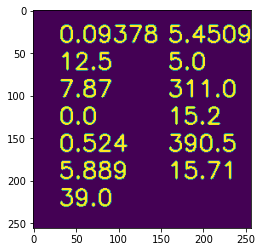

In [31]:
plt.imshow(x[0,1,:])

In [32]:
model = load_model("resnet18",1)    

In [33]:
opt='Adagrad'
optimizer = opt_selection(model, opt)

In [34]:
criterion = nn.MSELoss()

In [35]:
best_train, best_val = np.inf, np.inf
epochs = 1000

In [ ]:
import copy
for epoch in range(1, epochs+1):
    # Train and Validate
    train_stats = train_step(model, criterion, optimizer, train_loader,"regression")
    valid_stats = valid_step(model, criterion, val_loader,"regression")
    print("train", train_stats)
    print("valid", valid_stats)
    # Keep best model
    if valid_stats['metric'] < best_val or train_stats['metric']<=best_train :
        best_train  = train_stats['metric']
        best_val    = valid_stats['metric']
        best_model_weights = copy.deepcopy(model.state_dict())

# Load best model and evaluate on test set
model.load_state_dict(best_model_weights)
test_stats = valid_step(model, criterion, test_loader)
print('\nBests Model Accuracies: Train: {:4.2f} | Val: {:4.2f} | Test: {:4.2f}'.\
      format(best_train, 
             best_val, 
             test_stats['metric']))

train {'loss': 2.3158095391785563, 'metric': 0.02812724136654117}
valid {'loss': 43.34424723353638, 'metric': 0.8101728454866612}
train {'loss': 1.0554557544069176, 'metric': 0.012819300660812764}
valid {'loss': 1.6281617060393412, 'metric': 0.030432929084847498}
train {'loss': 0.6762684952178778, 'metric': 0.008213787391310257}
valid {'loss': 1.3213671627461696, 'metric': 0.024698451640115318}
train {'loss': 0.36013068296327483, 'metric': 0.004374056878096455}
valid {'loss': 0.8179795352496939, 'metric': 0.015289337107470914}
train {'loss': 0.25650309229394364, 'metric': 0.0031154221736106515}
valid {'loss': 0.6273206592122911, 'metric': 0.01172561979836058}
train {'loss': 0.18255923706169552, 'metric': 0.0022173186687655328}
valid {'loss': 0.4651185897401894, 'metric': 0.008693805415704475}
train {'loss': 0.13113977460732948, 'metric': 0.0015927907847044067}
valid {'loss': 0.4838347159230128, 'metric': 0.009043639549962856}
train {'loss': 0.0963463701199556, 'metric': 0.0011701988273

train {'loss': 0.006905667742103146, 'metric': 8.387450698910703e-05}
valid {'loss': 0.37162334620330423, 'metric': 0.006946230770155219}
train {'loss': 0.008357546280664282, 'metric': 0.00010150865927932326}
valid {'loss': 0.46768543920205885, 'metric': 0.008741783910318856}
train {'loss': 0.008648659862351733, 'metric': 0.00010504445176945424}
valid {'loss': 0.46013767591554067, 'metric': 0.008600704222720386}
train {'loss': 0.009116304374620118, 'metric': 0.00011072434463101358}
valid {'loss': 0.21462342012915417, 'metric': 0.00401165271269447}
train {'loss': 0.00847635896521805, 'metric': 0.00010295172832248642}
valid {'loss': 0.44422256295383034, 'metric': 0.00830322547577253}
train {'loss': 0.007163173266132753, 'metric': 8.700210444695651e-05}
valid {'loss': 0.2691845584352744, 'metric': 0.005031487073556531}
train {'loss': 0.006298056058702344, 'metric': 7.649460800043333e-05}
valid {'loss': 0.4386431847286067, 'metric': 0.008198938032310405}
train {'loss': 0.005185918428796341

train {'loss': 0.0013766240407903144, 'metric': 1.672013005008479e-05}
valid {'loss': 0.31459491362325653, 'metric': 0.005880278759313206}
train {'loss': 0.0013441050994458033, 'metric': 1.6325163151163603e-05}
valid {'loss': 0.29195468478532055, 'metric': 0.005457096911875151}
train {'loss': 0.0011994047765229471, 'metric': 1.456766935048114e-05}
valid {'loss': 0.28918240542282453, 'metric': 0.0054052786060341034}
train {'loss': 0.0011314201880724408, 'metric': 1.3741945604118714e-05}
valid {'loss': 0.2298530146422743, 'metric': 0.004296318030696716}
train {'loss': 0.0009797487882055114, 'metric': 1.1899782852698518e-05}
valid {'loss': 0.19020931281857875, 'metric': 0.0035553142582911918}
train {'loss': 0.000909388615777475, 'metric': 1.1045205859645445e-05}
valid {'loss': 0.21681468360333955, 'metric': 0.0040526109084736365}
train {'loss': 0.0007611267949257469, 'metric': 9.24445499909814e-06}
valid {'loss': 0.4082051709235335, 'metric': 0.007630003194832402}
train {'loss': 0.0007013

In [22]:
test_stats

{'loss': 0.0, 'metric': 0.0045248558570619895}